In [1]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inLine

In [16]:
band4 = rasterio.open('LC08_L1TP_042035_20180603_20180615_01_T1_B5_clip.tif')
band5 = rasterio.open('LC08_L1TP_042035_20180603_20180615_01_T1_B4_clip.tif') 


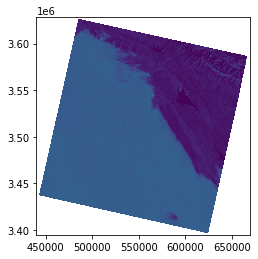

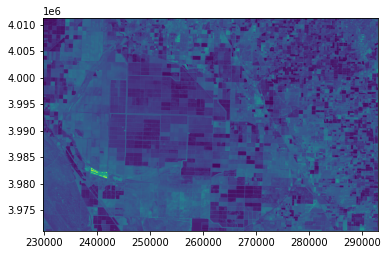

<AxesSubplot: >

In [17]:
plot.show(lhr)
plot.show(band5)

In [11]:
band4.read(1)

array([[24079, 24061, 24131, ...,  9747, 10231, 11190],
       [24169, 24213, 24173, ...,  9900, 10084, 10855],
       [24253, 24438, 24265, ...,  9910, 10079, 11592],
       ...,
       [21594, 20611, 20397, ..., 20179, 20035, 19973],
       [21441, 20507, 19362, ..., 20189, 19976, 19941],
       [21080, 20536, 20172, ..., 20531, 20744, 20915]], dtype=uint16)

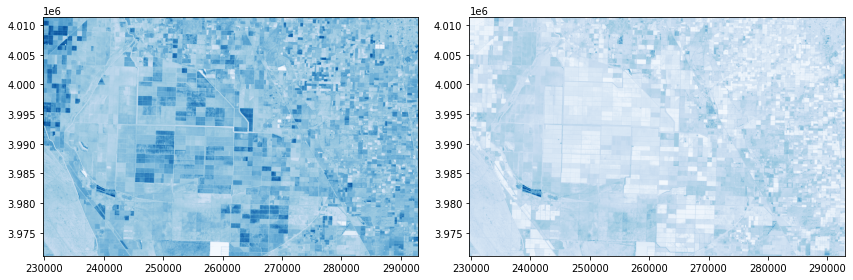

In [5]:
#Displaying both bands side by side
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
plot.show(band4, ax=ax1, cmap='Blues') #red
plot.show(band5, ax=ax2, cmap='Blues') #nir
fig.tight_layout()

In [6]:
nir = band5.read(1).astype('float64')
red = band4.read(1).astype('float64')

In [7]:
ndvi = np.where(
    (nir+red)==0.,
    0,
    (nir-red)/(nir+red))

ndvi


array([[-0.52601559, -0.525987  , -0.5271335 , ..., -0.04151306,
        -0.05381882, -0.06373877],
       [-0.52721873, -0.52758588, -0.52751975, ..., -0.04496517,
        -0.04850533, -0.05788909],
       [-0.52774803, -0.53187488, -0.52999779, ..., -0.04178712,
        -0.04831244, -0.06602906],
       ...,
       [-0.1105454 , -0.11332577, -0.11401185, ..., -0.27119819,
        -0.27566776, -0.2792135 ],
       [-0.11084631, -0.1142081 , -0.11648022, ..., -0.2695089 ,
        -0.27830038, -0.28419629],
       [-0.10991181, -0.12335211, -0.12403878, ..., -0.24283423,
        -0.23340369, -0.22729807]])

In [8]:
ndviImage = rasterio.open('ndviImage.tiff','w',driver='Gtiff', width=band4.width, height = band4.height, count=1, crs=band4.crs, transform=band4.transform, dtype='float64')
ndviImage.write(ndvi,1)
ndviImage.close()

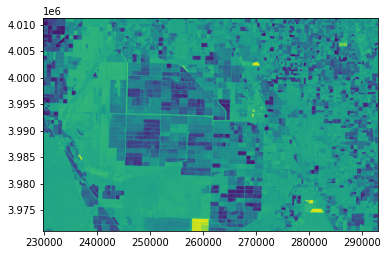

<AxesSubplot: >

In [9]:
ndvi = rasterio.open('ndviImage.tiff')
plot.show(ndvi)